# [[데이콘] 따릉이 대여량 예측 경진대회](https://dacon.io/competitions/official/235837/overview/description)

**변수 설명**
- date_time : 일별 날짜
- wind_direction: 풍향 (degree)
-sky_condition : 하늘 상태 (하단 설명 참조)
-precipitation_form : 강수 형태 (하단 설명 참조)
-wind_speed : 풍속 (m/s)
-humidity : 습도 (%)
-low_temp : 최저 기온 ( `C)
-high_temp : 최고 기온 ( `C)
-Precipitation_Probability : 강수 확률 (%)
-number_of_rentals : 따릉이 대여량

**sample_submissoin.csv : 제출 양식**  
- date_time : 일별 날짜  
- number_of_rentals : 따릉이 대여량

**데이터 상세 설명**  
기상 데이터는 하루에 총 8번 3시간 간격으로 발표되는 기상단기예보(SHRT) 데이터를 1일 평균으로 변환한 데이터입니다.  
2019년 6월 4일 까지 sky_condition (하늘 상태) 코드  : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)  
2020년  sky_condition (하늘 상태) 코드  : 맑음(1), 구름많음(3), 흐림(4)  
precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)  
원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.

### step1. 필요한 패키지 및 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn-whitegrid'])
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'Malgun Gothic')

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459


### step2. EDA

In [4]:
data_description = train_data.describe()
data_description

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


In [6]:
train_data.isnull().sum()

date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
number_of_rentals            0
dtype: int64

In [7]:
# sns.pairplot(data=train_data)

#### **date_time 날짜 처리**

In [8]:
# year, month, day 변수 생성
year, month, day = [], [], []
for i in range(len(train_data['date_time'])):
    year.append(int(train_data['date_time'][i].split('-')[0]))
    month.append(int(train_data['date_time'][i].split('-')[1]))
    day.append(int(train_data['date_time'][i].split('-')[2]))

In [9]:
train_data['year']=year
train_data['month']=month
train_data['day']=day

In [10]:
train_data.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5


#### **각 변수별 분포 확인**

In [11]:
col_list = train_data.columns.tolist()[1:-3]
col_list

['wind_direction',
 'sky_condition',
 'precipitation_form',
 'wind_speed',
 'humidity',
 'low_temp',
 'high_temp',
 'Precipitation_Probability',
 'number_of_rentals']

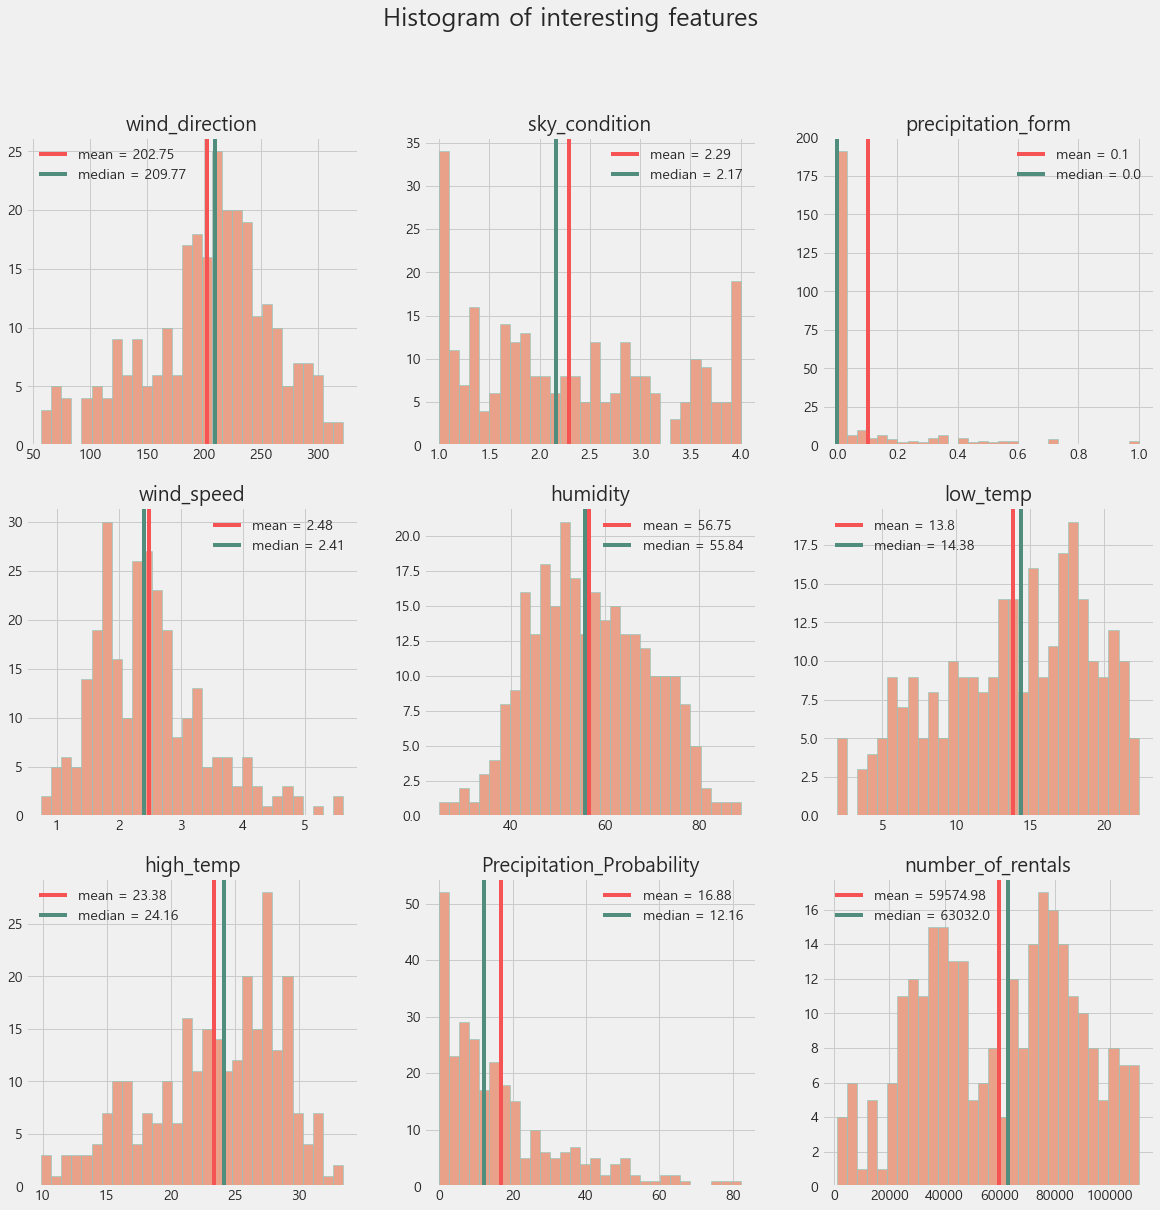

In [12]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Histogram of interesting features', fontsize=25)

col_index = 0
for i in range(3):
    for j in range(3):
        ax[i,j].hist(train_data[col_list[col_index]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i,j].set_title(col_list[col_index])
        ax[i,j].axvline(data_description[col_list[col_index]]['mean'], c='#f55354', label=f"mean = {round(data_description[col_list[col_index]]['mean'], 2)}") # 평균값 수직선
        ax[i,j].axvline(data_description[col_list[col_index]]['50%'], c='#518d7d', label=f"median = {round(data_description[col_list[col_index]]['50%'], 2)}") # 중앙값 수직선
        ax[i,j].legend()
        col_index +=1

#### **요일 변수 생성**

In [13]:
week_day = pd.to_datetime(train_data['date_time']).dt.day_name()
train_data['week_day'] = week_day
train_data.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,Sunday
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,Monday
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,Tuesday
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,Wednesday
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,Thursday


#### **변수간 상관관계 파악(+ 히트맵)**

In [14]:
train_number = train_data.select_dtypes(np.number) #상관분석은 숫자로 계산할 수 있으므로 데이터에서 숫자로 이루어진 컬럼만을 뽑는다 (date_time drop)

In [15]:
corr = train_number.corr()
corr

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
wind_direction,1.000000,-0.386683,-0.348118,0.079138,-0.217112,-0.135984,-0.029813,-0.394495,0.209996,8.915683e-02,-3.300990e-02,-1.029335e-01
sky_condition,-0.386683,1.000000,0.673814,0.140816,0.651321,0.088365,-0.151566,0.912601,-0.384234,-1.137155e-01,6.051376e-02,6.939584e-02
precipitation_form,-0.348118,0.673814,1.000000,0.287325,0.610185,0.045704,-0.143994,0.910609,-0.420458,-3.873091e-02,3.912342e-02,6.067542e-02
wind_speed,0.079138,0.140816,0.287325,1.000000,0.036239,-0.399858,-0.443547,0.241207,-0.464761,-1.767765e-01,-2.497985e-01,-1.288720e-01
humidity,-0.217112,0.651321,0.610185,0.036239,1.000000,0.414155,0.190136,0.685743,-0.147824,-2.446968e-02,3.552106e-01,2.114200e-01
low_temp,-0.135984,0.088365,0.045704,-0.399858,0.414155,1.000000,0.920522,0.072320,0.317741,-2.202316e-02,8.781012e-01,2.652248e-01
high_temp,-0.029813,-0.151566,-0.143994,-0.443547,0.190136,0.920522,1.000000,-0.163797,0.423113,-6.233169e-03,8.303056e-01,2.249114e-01
Precipitation_Probability,-0.394495,0.912601,0.910609,0.241207,0.685743,0.072320,-0.163797,1.000000,-0.449225,-9.386428e-02,5.062654e-02,6.325526e-02
number_of_rentals,0.209996,-0.384234,-0.420458,-0.464761,-0.147824,0.317741,0.423113,-0.449225,1.000000,7.390113e-01,3.200193e-01,5.076042e-02
year,0.089157,-0.113716,-0.038731,-0.176776,-0.024470,-0.022023,-0.006233,-0.093864,0.739011,1.000000e+00,1.919660e-13,7.716023e-14


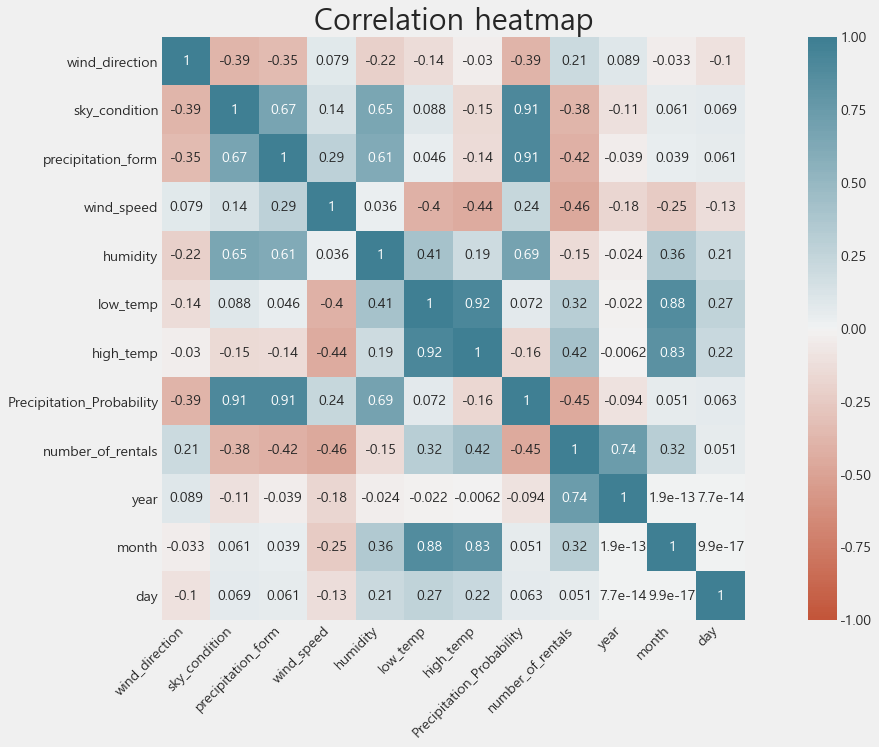

In [16]:
colormap = plt.cm.PuBu
plt.figure(figsize=(20, 10))
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True # 값 출력
    )

ax.set_xticklabels( # 사용자 지정 눈금 레이블 설정
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    )

plt.title('Correlation heatmap', fontsize=30)
plt.show()

#### **날짜별 따릉이 대여량 파악**

In [17]:
year_rentals = train_data.groupby('year').sum()['number_of_rentals']
month_rentals = train_data.groupby('month').sum()['number_of_rentals']
day_rentals = train_data.groupby('day').sum()['number_of_rentals']

Text(0.5, 1.0, 'days')

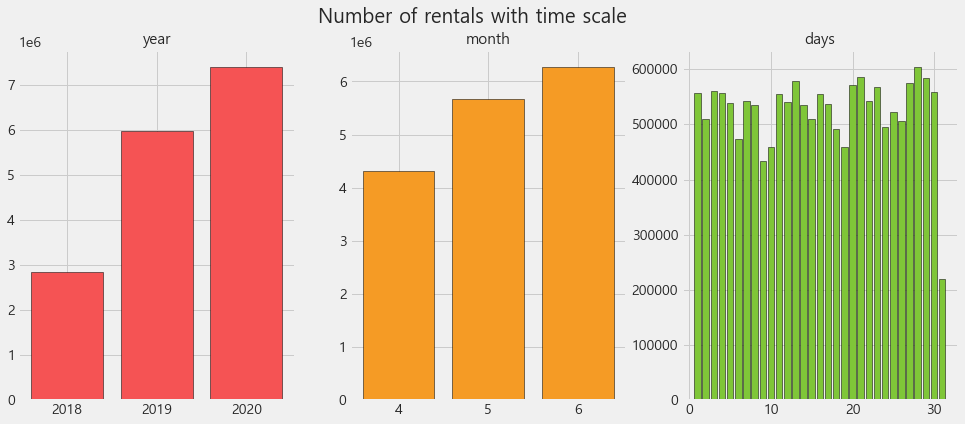

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Number of rentals with time scale', fontsize=20)

ax[0].bar(x=['2018', '2019', '2020'], height=year_rentals, color='#f55354', edgecolor='black')
ax[0].set_title('year', fontsize = 15)

ax[1].bar(x = ['4', '5', '6'], height=month_rentals, color='#f59b25', edgecolor='black')
ax[1].set_title('month', fontsize = 15)

ax[2].bar(x=day_rentals.index.to_list(), height = day_rentals, color='#7fc638', edgecolor='black')
ax[2].set_title('days', fontsize = 15)

In [19]:
day_table = train_data.groupby('week_day').sum()
day_table = day_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_table

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
week_day,,,,,,,,,,,,
Monday,8144.812,85.530,3.305,98.396,2151.638,528.000,902.421,602.345,2330334,78741,194,602
Tuesday,7752.874,88.997,3.424,102.334,2215.106,526.836,900.790,638.996,2288535,78741,195,611
Wednesday,8521.012,82.406,4.795,101.295,2221.313,521.922,904.184,632.138,2347456,78741,194,590
Thursday,8100.986,85.124,3.657,93.370,2233.871,538.623,912.106,606.975,2324045,78741,194,629
Friday,7624.108,89.503,4.176,96.423,2218.403,551.600,919.460,667.613,2372485,78741,196,607
Saturday,7501.475,93.830,4.148,92.526,2213.861,557.086,922.491,717.963,2374604,78741,197,615
Sunday,7705.747,99.304,4.058,92.959,2237.327,542.036,922.580,741.692,2226510,78741,195,624


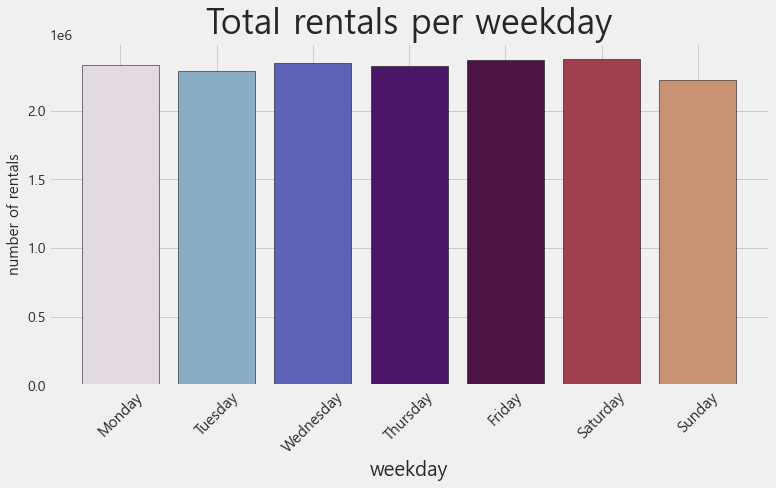

In [20]:
plt.figure(figsize=(11, 7))
color_map = plt.get_cmap('twilight')
color_list = [color_map.colors[i] for i in range(0, 512, 72)]
plt.bar(x=day_table.index, height=day_table.number_of_rentals, edgecolor='black', color = color_list)
plt.xticks(rotation=45, fontsize=15)
plt.title('Total rentals per weekday', fontsize=35)
plt.xlabel('weekday', fontsize=20)
plt.ylabel('number of rentals', fontsize=15)
plt.tight_layout()
plt.show()

#### **강수확률, 하늘상태 산점도**

In [21]:
train_data.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,Sunday
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,Monday
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,Tuesday
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,Wednesday
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,Thursday


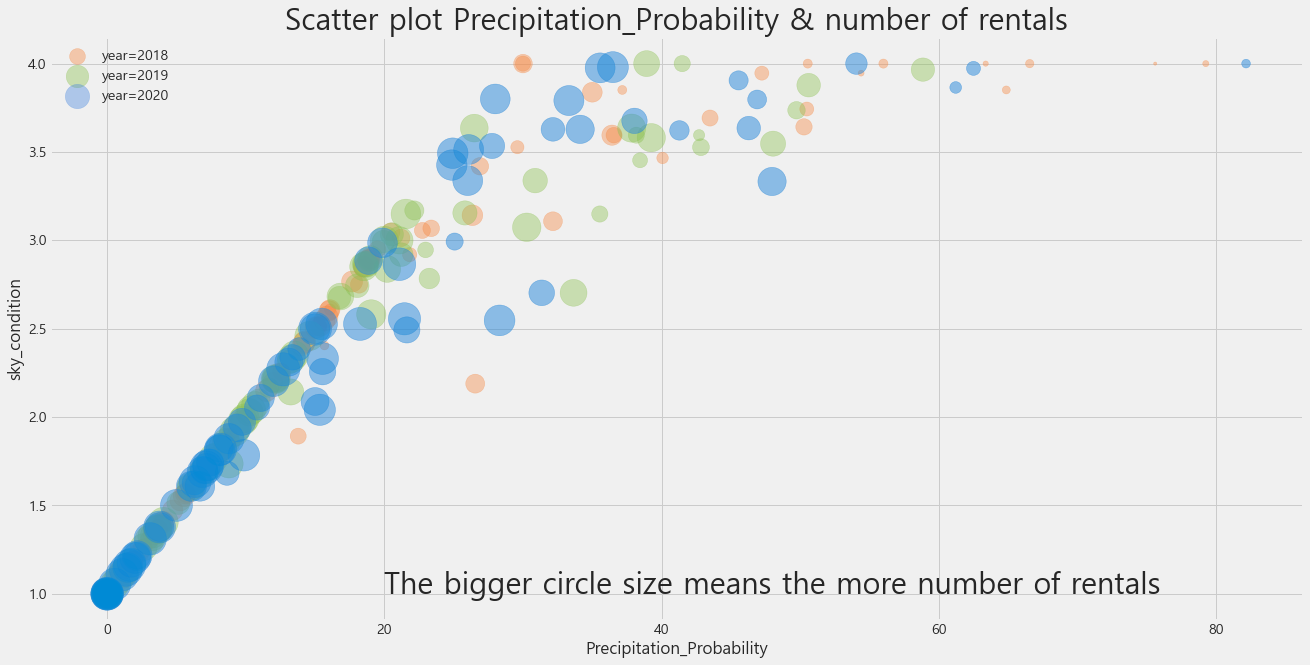

In [22]:
years = [2018, 2019, 2020]
colors = ['#f68842', '#8cc152', '#4a89df']

plt.figure(figsize=(20,10))

for year, color in zip(years, colors):
    percipitation_prb = train_data[train_data['year'] == year].sort_values(by='Precipitation_Probability')['Precipitation_Probability']
    rentals = train_data[train_data['year'] == year].sort_values(by='Precipitation_Probability')['number_of_rentals']
    sky_condition = train_data[train_data['year'] == year].sort_values(by='Precipitation_Probability')['sky_condition']
    
    plt.scatter(x=percipitation_prb, y=sky_condition, s=rentals/100, alpha=.4, c=color, label=f'year={year}')
    
plt.scatter(percipitation_prb, sky_condition, s=rentals/100, alpha=.2)
plt.title('Scatter plot Precipitation_Probability & number of rentals', fontsize=30)
plt.xlabel('Precipitation_Probability')
plt.ylabel('sky_condition')
plt.text(20, 1.0, 'The bigger circle size means the more number of rentals', fontsize=30)
plt.legend()
plt.show()

In [23]:
list(zip(years, colors))

[(2018, '#f68842'), (2019, '#8cc152'), (2020, '#4a89df')]

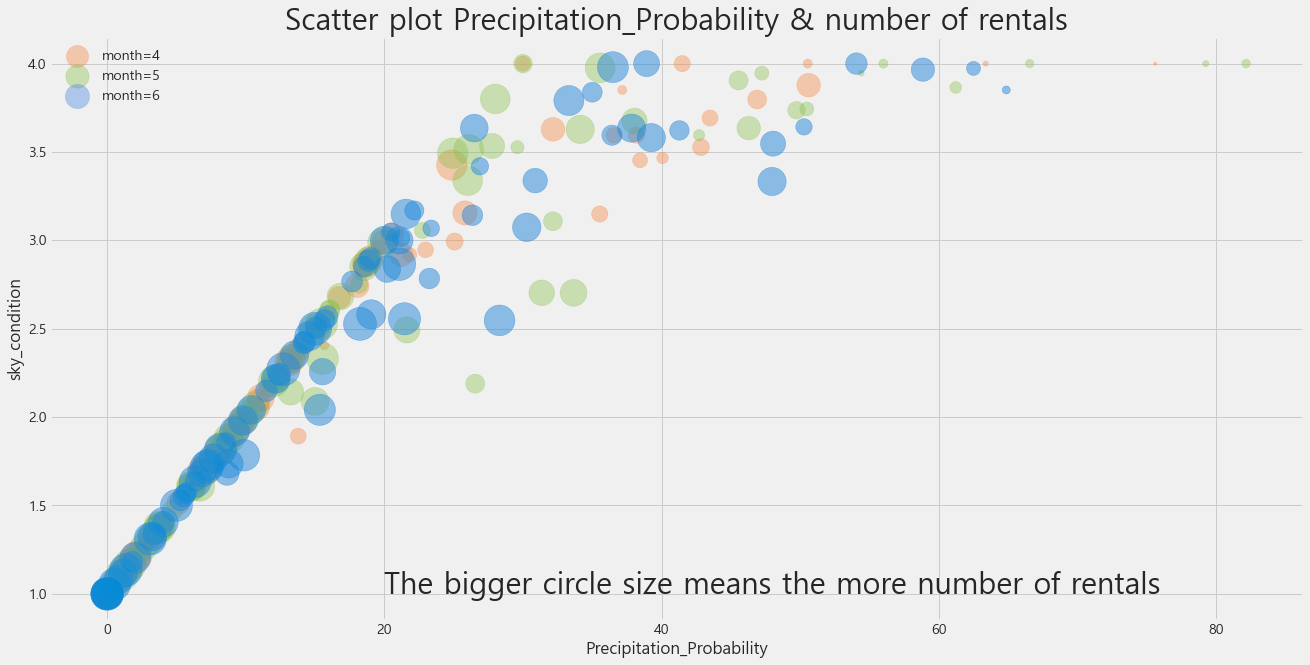

In [24]:
months = [4, 5, 6]
colors = ['#f68842', '#8cc152', '#4a89df']

plt.figure(figsize=(20,10))

for month, color in zip(months, colors):
    percipitation_prb = train_data[train_data['month'] == month].sort_values(by='Precipitation_Probability')['Precipitation_Probability']
    rentals = train_data[train_data['month'] == month].sort_values(by='Precipitation_Probability')['number_of_rentals']
    sky_condition = train_data[train_data['month'] == month].sort_values(by='Precipitation_Probability')['sky_condition']
    
    plt.scatter(x=percipitation_prb, y=sky_condition, s=rentals/100, alpha=.4, c=color, label=f'month={month}')
    
plt.scatter(percipitation_prb, sky_condition, s=rentals/100, alpha=.2)
plt.title('Scatter plot Precipitation_Probability & number of rentals', fontsize=30)
plt.xlabel('Precipitation_Probability')
plt.ylabel('sky_condition')
plt.text(20, 1.0, 'The bigger circle size means the more number of rentals', fontsize=30)
plt.legend()
plt.show()

### step3. 예측 모델 생성 및 검증

In [41]:
# 필요한 패키지 로드
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import multiprocessing

In [30]:
# train 데이터셋 분할
X = train_data.drop(columns=['date_time', 'number_of_rentals', 'week_day'])
y = train_data.number_of_rentals

#### **LinearRegression**

In [48]:
# scale 전 모델 생성 및 평가
model = LinearRegression()
model.fit(X, y)

y_predict = model.predict(X)

print('scale 전 모델 평가: {}'.format(model.score(X, y)))
print('MSE: {}'.format(mean_squared_error(y, y_predict)))
print('RMSE: {}'.format(mean_squared_error(y, y_predict)**.5))
print('R2 score: {}'.format(r2_score(y, y_predict)))

scale 전 모델 평가: 0.8557444087318935
MSE: 109958787.40681772
RMSE: 10486.123564350066
R2 score: 0.8557444087318935


In [40]:
# StandardScaler 스케일링
scaler1 = StandardScaler()
X_stand = scaler1.fit_transform(X)

stand_model = LinearRegression()
stand_model.fit(X_stand, y)

# MinMaxScaler 스케일링
scaler2 = MinMaxScaler()
X_MM = scaler2.fit_transform(X)

MM_model = LinearRegression()
MM_model.fit(X_MM, y)

# scale 모델
print('StandardScaler 후 모델 평가: {}'.format(stand_model.score(X_stand, y)))
print('MinMaxScaler 후 모델 평가: {}'.format(MM_model.score(X_MM, y)))

StandardScaler 후 모델 평가: 0.8557444087318927
MinMaxScaler 후 모델 평가: 0.8557444087318927


In [60]:
# 회귀식 산출

# print(model.coef_) # 회귀계수
# print(model.intercept_) # y절편

print('y =' + str(model.intercept_) + '')
for i, c  in enumerate(model.coef_):
    print(str(c) + '* x'+  str(i))

y =-47252010.58963955
24.50956022608961* x0
1931.0067308615849* x1
-21357.553233656472* x2
-4157.024791529749* x3
37.04119949404395* x4
-476.5680201782553* x5
1484.321907681996* x6
-362.3927109705015* x7
23410.52256664257* x8
4797.102961459243* x9
45.643963580192995* x10


In [65]:
# 교차검증
scores = cross_val_score(estimator=model,
               X=X, y=y,
               cv = 5,
               n_jobs=multiprocessing.cpu_count()
               )

scores # R2 socres

array([-0.36817301, -0.20664959,  0.25646878,  0.37661998,  0.49995964])

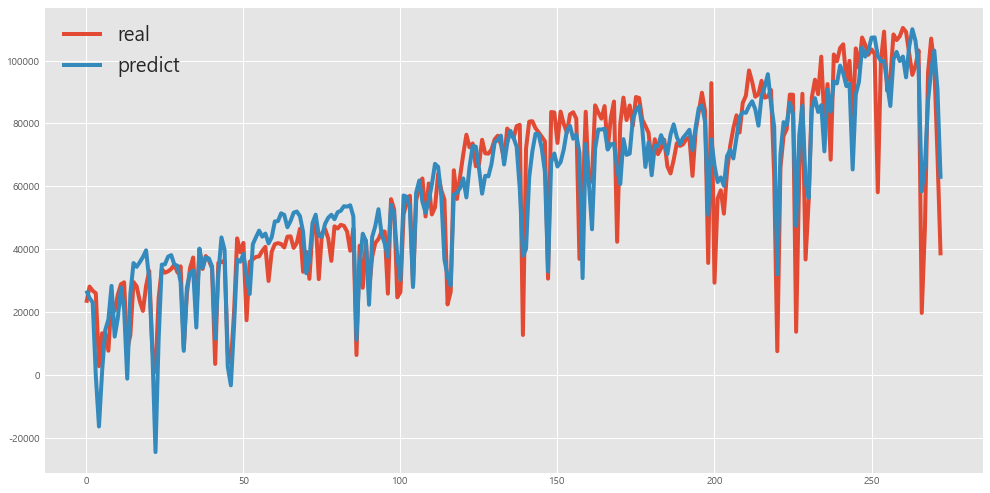

In [75]:
# 그래프 시각화
plt.style.use('ggplot')
plt.figure(figsize=(15, 8))
plt.plot(y, label='real')
plt.plot(y_predict, label='predict')
plt.legend(fontsize=20)
plt.show()

#### **Ridge, Lasso**

In [86]:
# Ridge
ridge = Ridge()
ridge.fit(X, y)

print('Ridge 학습 데이터 점수: {}'.format(ridge.score(X, y)))

param_grid = [{'alpha': [.001, .01, .1, 1.0, 10, 100, 1000]}]
gs = GridSearchCV(estimator=ridge, 
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  cv=5)
result = gs.fit(X, y)

print('최적 파라미터: {}'.format(gs.best_params_))
print('최적 점수: {}'.format(gs.best_score_))
print(result.best_estimator_)

Ridge 학습 데이터 점수: 0.8554092119688348
최적 파라미터: {'alpha': 10}
최적 점수: 0.2031256616210423
Ridge(alpha=10)


In [87]:
# Lasso
lasso = Lasso()
lasso.fit(X, y)

print('Lasso 학습 데이터 점수: {}'.format(lasso.score(X, y)))

param_grid = [{'alpha': [.001, .01, .1, 1.0, 10, 100, 1000]}]
gs = GridSearchCV(estimator=lasso, 
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  cv=5)
result = gs.fit(X, y)

print('최적 파라미터: {}'.format(gs.best_params_))
print('최적 점수: {}'.format(gs.best_score_))
print(result.best_estimator_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451857822.7961731, tolerance: 20809417.990786813
  model = cd_fast.enet_coordinate_descent(


Lasso 학습 데이터 점수: 0.8557434117961054
최적 파라미터: {'alpha': 1000}
최적 점수: 0.22254278686103915
Lasso(alpha=1000)


### step4. 모델을 통한 예측

In [95]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  91 non-null     object 
 1   wind_direction             91 non-null     float64
 2   sky_condition              91 non-null     float64
 3   precipitation_form         91 non-null     float64
 4   wind_speed                 91 non-null     float64
 5   humidity                   91 non-null     float64
 6   low_temp                   91 non-null     float64
 7   high_temp                  91 non-null     float64
 8   Precipitation_Probability  91 non-null     float64
dtypes: float64(8), object(1)
memory usage: 6.5+ KB


In [90]:
# test 데이터셋 결측치 확인
test_data.isnull().sum()

date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
dtype: int64

In [104]:
# test 데이터셋 연도, 월, 일 변수 생성
year, month, day = [], [], []
for i in range(len(test_data['date_time'])):
    year.append(int(test_data['date_time'][i].split('-')[0]))
    month.append(int(test_data['date_time'][i].split('-')[1]))
    day.append(int(test_data['date_time'][i].split('-')[2]))
test_data['year']=year
test_data['month']=month
test_data['day']=day

test_data.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021,4,1
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021,4,2
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021,4,3
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021,4,4
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021,4,5


In [107]:
# 문자열인 date_time 컬럼 삭제
X_test = test_data.drop(columns='date_time')

# 앞서 생성한 모델에 X_test 데이터를 넣고 예측
y_test = model.predict(X_test)

### step5. 제출

In [114]:
# 제출 파일 불러오기
submission = pd.read_csv('sample_submission.csv')

# 제출 파일의 number_of_rentals 컬럼에 예측값 대입
submission['number_of_rentals'] = y_test

# 제출 파일 생성
submission.to_csv('sample_submission.csv', index = False)